# Metabolic Syndrome Prediction 
Part 2

*Christina Brockway*

## Business Understanding
**Stakeholder Needs:** To look at common risk factors and use a machine learning model to predict the likelihood of someone having metabolic syndrome.

**Metabolic Syndrome Prediction**

Other Names: Syndrome X, Insulin Resistance Syndrome, Dysmetabolic Syndrome
Definition: A cluster of conditions that cause and increased risk for heart disease, stroke, and diabetes
According to the Mayo Clinic, metabolic syndrome will cause an increase in the risk of heart disease, stroke, and type 2 diabetes. This syndrome is caused by the presence of multiple risk factors such as body mass index, waist circumference, cholesterol levels, age, and other various factors. The National Heart, Lung, and Blood Institue says the syndrome is found in about 1 in 3 adults making it farily common. A diagnosis of metabolic syndrome, although eye opening, doesn't mean patients are definitively getting diabetes or having a stroke. With the right diet and healthy lifestyle changes, metabolic syndrome is preventable, thus showing the importantance of identifying it.

The goal of this projest is to use a series of risk factors, and create a model that can predict the likihood of metabolic syndrome in patients. The dataset provided came from the NHANES initiative. It contains variables including: waist circumference, triglyerades, cholesterol levels, race, income, uric acid levels, age, gender, marital status, body mass index, urine albumin grades and rates, and blood glucose levels.

The target for this dataset is the metabolic syndrome feature. SEQN will be set as the index as it is a unique identifier. There are 2401 records representing a person and their attributes of which there are 13. There are some columns that have null values needing to be imputed. The feature 'UrAlbCr' was not defined and and assumption was made as to what is being represented based on the NIH and Cleavland Clinic websites. Aside from "UrAlbCr" not being defined, there don't appear to be any chanllenges with the dataset that would interfere with modeling.


**Task:**

Choose at least one feature selection or feature engineering method to apply to the data and compare the models’  performance with and without engineering.

*Apply clustering**
    * select the appropriate number of clusters
    * use the clustering object to get predicted cluster labels for the training and test data. 
    *  Concatenate/combine these clusters with the original feature
    *  Only fit KMeans on the training data 
        -  use kmeans.predict(X_test) to create cluster labels for the test data.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky" colspan="5"><span style="font-weight:bold;font-style:italic">Data Dictionary for Metabolic Syndrome Dataset </span></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky"><span style="font-weight:bold">Feature</span></td>
    <td class="tg-0pky"><span style="font-weight:bold">dtype</span></td>
    <td class="tg-0pky"><span style="font-weight:bold">Expected Range</span></td>
    <td class="tg-0pky"><span style="font-weight:bold">Definition</span></td>
    <td class="tg-0pky"><span style="font-weight:bold;font-style:italic">cat, num, ord</span></td>
  </tr>
  <tr>
    <td class="tg-0pky"><span style="font-weight:bold;font-style:italic">seqn</span></td>
    <td class="tg-0pky">int</td>
    <td class="tg-0pky">#</td>
    <td class="tg-0pky">sequential identification number</td>
    <td class="tg-0pky"><span style="font-weight:bold;font-style:italic">Index?</span></td>
  </tr>
  <tr>
    <td class="tg-0pky">Age</td>
    <td class="tg-0pky">int</td>
    <td class="tg-0pky">20-80</td>
    <td class="tg-0pky">age of individual<br></td>
    <td class="tg-0pky">num</td>
  </tr>
  <tr>
    <td class="tg-0pky">Sex</td>
    <td class="tg-0pky">str</td>
    <td class="tg-0pky">Male<br>Female</td>
    <td class="tg-0pky">gender of individual</td>
    <td class="tg-0pky">cat</td>
  </tr>
  <tr>
    <td class="tg-0pky">Marital</td>
    <td class="tg-0pky">str</td>
    <td class="tg-0pky">Married<br>Single<br>Divorced<br>Widowed<br>Separated</td>
    <td class="tg-0pky">marital status</td>
    <td class="tg-0pky">cat</td>
  </tr>
  <tr>
    <td class="tg-0pky">Income</td>
    <td class="tg-0pky">int</td>
    <td class="tg-0pky">#</td>
    <td class="tg-0pky">income information</td>
    <td class="tg-0pky">num</td>
  </tr>
  <tr>
    <td class="tg-0pky">Race</td>
    <td class="tg-0pky">str</td>
    <td class="tg-0pky">Other<br>MexAmerican<br>Hispanic<br>Asian<br>Black<br>White</td>
    <td class="tg-0pky">race of individual</td>
    <td class="tg-0pky">cat</td>
  </tr>
  <tr>
    <td class="tg-0pky">WaistCirc</td>
    <td class="tg-0pky">float</td>
    <td class="tg-0pky">risk factor(cm): Men, Women<br>low: &lt; 94m,&nbsp;&nbsp;80w<br>high: 94-102m, 80-88w<br>very high: &gt; 102m, 88w</td>
    <td class="tg-0pky">Circumference of the waist</td>
    <td class="tg-0pky">num</td>
  </tr>
  <tr>
    <td class="tg-0pky">BMI</td>
    <td class="tg-0pky">float</td>
    <td class="tg-0pky">Underweight:&lt; 18.5<br>Normal:18.5-24.9<br>Overweight: 25-29.9<br>Obese: &gt; 30<br></td>
    <td class="tg-0pky">body mass index, a measurement of body composition using height and weight </td>
    <td class="tg-0pky">num</td>
  </tr>
  <tr>
    <td class="tg-0pky">Albuminuria</td>
    <td class="tg-0pky">int</td>
    <td class="tg-0pky">0<br>1<br>2</td>
    <td class="tg-0pky">aka proteinuria<br>a scale grading levels of albumin in urine<br><span style="font-weight:bold">A1: &lt;10-30 Normal or mildly elevated </span><br><span style="font-weight:bold">A2:  30-300 moderately elevated</span><br><span style="font-weight:bold">A3:  &gt;300 albuminuria</span></td>
    <td class="tg-0pky">ord<br></td>
  </tr>
  <tr>
    <td class="tg-0pky">UrAlbCr</td>
    <td class="tg-0pky">float</td>
    <td class="tg-0pky">A1: &lt;30 Normal or mildly elevated <br>A2:  30-300 moderately elevated<br>A3:  &gt;300 albuminuria<br></td>
    <td class="tg-0pky">UACR - ratio of the levels of albumin and creatin in urine</td>
    <td class="tg-0pky">num</td>
  </tr>
  <tr>
    <td class="tg-0pky">UricAcid</td>
    <td class="tg-0pky">float</td>
    <td class="tg-0pky">Normal female: &gt;6mg/dL<br>Normal male: &gt;7 mg/dL</td>
    <td class="tg-0pky">measures amount of uric acid in blood<br>Uric acid is a normal body waste product<br>too high may mean kidneys are not working properly</td>
    <td class="tg-0pky">num</td>
  </tr>
  <tr>
    <td class="tg-0pky">BloodGlucose</td>
    <td class="tg-0pky">int</td>
    <td class="tg-0pky">Normal 80-130mg/dL</td>
    <td class="tg-0pky">Level of glucose in blood<br>too low or too high indicated blood sugar control issues</td>
    <td class="tg-0pky">num</td>
  </tr>
  <tr>
    <td class="tg-0pky">HDL</td>
    <td class="tg-0pky">int</td>
    <td class="tg-0pky">Normal male:  &lt; 40mg/dL <br>Normal female: &lt;50mg/dL</td>
    <td class="tg-0pky">"good" cholesterol levels in blood<br>a lower HDL means higher risk for heart attack</td>
    <td class="tg-0pky">num</td>
  </tr>
  <tr>
    <td class="tg-0pky">Triglycerides</td>
    <td class="tg-0pky">int</td>
    <td class="tg-0pky">150-199 mg/dL borderline<br>200-499 mg/dL high<br>&gt;500 mg/dL very high</td>
    <td class="tg-0pky">amount of triglycerides in blood<br>high levels means risk for stroke or heart attack</td>
    <td class="tg-0pky">num</td>
  </tr>
  <tr>
    <td class="tg-0pky"><span style="font-weight:bold;font-style:italic">MetabolicSyndrome</span></td>
    <td class="tg-0pky">str</td>
    <td class="tg-0pky">No MetSyn<br>MetSyn</td>
    <td class="tg-0pky">does the individual have metabolic syndrome</td>
    <td class="tg-0pky"><span style="font-weight:bold;font-style:italic">target</span></td>
  </tr>
</tbody>
</table>

**Sources:**

https://www.urmc.rochester.edu/encyclopedia/

https://www.nhlbi.nih.gov/health/metabolic-syndrome/diagnosis

https://my.clevelandclinic.org/health/diseases/10783-metabolic-syndrome

https://www.kidney.org/content/kidney-failure-risk-factor-urine-albumin-to-creatinine-ration-uacr

Using the dataset found on Dataworld: https://data.world/informatics-edu/metabolic-syndrome-prediction

## Imports and Load Data

In [27]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier


##Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer,  make_column_selector, ColumnTransformer
from sklearn import set_config


#Select features
from sklearn.feature_selection import SelectFromModel
from sklearn.inspection import permutation_importance

#Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


set_config(transform_output='pandas')


In [26]:
#Define Custom Functions

def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
    # Get the classification report
    report = classification_report(y_true, y_pred)
    ## Print header and report
    header = "-"*70
    print(header, f" Classification Metrics: {label}", header, sep='\n')
    print(report)
    ## CONFUSION MATRICES SUBPLOTS
    fig, axes = plt.subplots(ncols=2, figsize=figsize)
    # create a confusion matrix  of raw counts
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
    axes[0].set_title("Raw Counts")
    # create a confusion matrix with the test data
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
    axes[1].set_title("Normalized Confusion Matrix")
    # Adjust layout and show figure
    fig.tight_layout()
    plt.show()
    # Return dictionary of classification_report
    if output_dict==True:
        report_dict = classification_report(y_true, y_pred, output_dict=True)
        return report_dict


def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
    # Get predictions for training data
    y_train_pred = model.predict(X_train)
    # Call the helper function to obtain regression metrics for training data
    results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
    print()
    # Get predictions for test data
    y_test_pred = model.predict(X_test)
    # Call the helper function to obtain regression metrics for test data
    results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
    if output_dict == True:
        # Store results in a dataframe if ouput_frame is True
        results_dict = {'train':results_train,
                    'test': results_test}
        return results_dict


In [2]:
df= pd.read_csv('data/clean_MetS.csv')
data = df.set_index('seqn')
data.head()

,Age,Sex,Marital,Income,Race,Waist,BMI,AlbRating,UricAcid,Glucose,HDL,Triglycerides,MetS
seqn,,,,,,,,,,,,,
62161,22,Male,Single,8200.0,White,81.0,23.3,0,4.9,92,41,84,No MetSyn
62164,44,Female,Married,4500.0,White,80.1,23.2,0,4.5,82,28,56,No MetSyn
62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.4,107,43,78,No MetSyn
62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.0,104,73,141,No MetSyn
62177,51,Male,Married,NaN,Asian,81.1,20.1,0,5.0,95,43,126,No MetSyn


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2401 entries, 62161 to 71915
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            2401 non-null   int64  
 1   Sex            2401 non-null   object 
 2   Marital        2193 non-null   object 
 3   Income         2284 non-null   float64
 4   Race           2401 non-null   object 
 5   Waist          2316 non-null   float64
 6   BMI            2375 non-null   float64
 7   AlbRating      2401 non-null   int64  
 8   UricAcid       2401 non-null   float64
 9   Glucose        2401 non-null   int64  
 10  HDL            2401 non-null   int64  
 11  Triglycerides  2401 non-null   int64  
 12  MetS           2401 non-null   object 
dtypes: float64(4), int64(5), object(4)
memory usage: 262.6+ KB


### Check for nulls 

In [4]:
data.isna().sum()

Age                0
Sex                0
Marital          208
Income           117
Race               0
Waist             85
BMI               26
AlbRating          0
UricAcid           0
Glucose            0
HDL                0
Triglycerides      0
MetS               0
dtype: int64

In [5]:
seed=42
X=df.drop(columns=['MetS'], axis=1)
y=df['MetS']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)

In [6]:
X_train.head(1)

,seqn,Age,Sex,Marital,Income,Race,Waist,BMI,AlbRating,UricAcid,Glucose,HDL,Triglycerides
263,63211,46,Female,Married,8200.0,White,124.0,40.8,0,3.3,140,53,198


### Preprocessing

In [7]:
#Instantiate the transformers
from sklearn.impute import KNNImputer
scaler=StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
knnimpute= KNNImputer(n_neighbors=3)

In [8]:
ordcols = X_train[['AlbRating']].columns
catcols = X_train.select_dtypes('object').columns
numcols = X_train.select_dtypes('number').drop(columns=ordcols).columns

In [9]:
#Create pipeline and tuple for numeric columns
num_pipe = make_pipeline(knnimpute, scaler)
num_tuple = ('numeric', num_pipe, numcols)
num_tuple

('numeric',
 Pipeline(steps=[('knnimputer', KNNImputer(n_neighbors=3)),
                 ('standardscaler', StandardScaler())]),
 Index(['seqn', 'Age', 'Income', 'Waist', 'BMI', 'UricAcid', 'Glucose', 'HDL',
        'Triglycerides'],
       dtype='object'))

In [10]:
#Create pipeline and tuple for catagorical columns
cat_pipe = make_pipeline(ohe, knnimpute, scaler)
cat_tuple = ('catagorical',cat_pipe, catcols)
cat_tuple

('catagorical',
 Pipeline(steps=[('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
                 ('knnimputer', KNNImputer(n_neighbors=3)),
                 ('standardscaler', StandardScaler())]),
 Index(['Sex', 'Marital', 'Race'], dtype='object'))

In [11]:
#Create pipeline and tuple for numeric columns
ord_tuple = ('ordinal', scaler, ordcols)
ord_tuple


('ordinal', StandardScaler(), Index(['AlbRating'], dtype='object'))

In [12]:
preprocessor = ColumnTransformer([num_tuple,cat_tuple, ord_tuple],
                               verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('knnimputer',
                                                  KNNImputer(n_neighbors=3)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['seqn', 'Age', 'Income', 'Waist', 'BMI', 'UricAcid', 'Glucose', 'HDL',
       'Triglycerides'],
      dtype='object')),
                                ('catagorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False)),
                                                 ('knnimputer',
                                                  KNNImputer(n_neighbors=3)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Sex', 'Marital', 'Race'], dtype='object')),
                                ('ordinal', StandardScaler(),
                                 Index(['AlbRating'], dtype='object'))],
                  verbose_feature_names_out=False)

In [13]:
X_train_tf = preprocessor.fit_transform(X_train)
X_test_tf = preprocessor.transform(X_test)
X_train_tf[:2]

,seqn,Age,Income,Waist,BMI,UricAcid,Glucose,HDL,Triglycerides,Sex_Female,...,Marital_Single,Marital_Widowed,Marital_nan,Race_Asian,Race_Black,Race_Hispanic,Race_MexAmerican,Race_Other,Race_White,AlbRating
263,-1.358170,-0.176875,1.409680,1.579916,1.811453,-1.503810,0.962189,-0.045041,0.728110,0.987852,...,-0.512125,-0.273179,-0.306961,-0.417335,-0.539674,-0.348562,-0.341504,-0.161944,1.256502,-0.366397
2073,1.239695,-0.857407,-0.193449,-0.763638,-0.637836,0.406271,0.185052,1.929154,-0.704544,-1.012298,...,-0.512125,-0.273179,-0.306961,-0.417335,-0.539674,-0.348562,2.928219,-0.161944,-0.795860,-0.366397


### Use KMeans Clustering

Text(0, 0.5, 'Inertia')

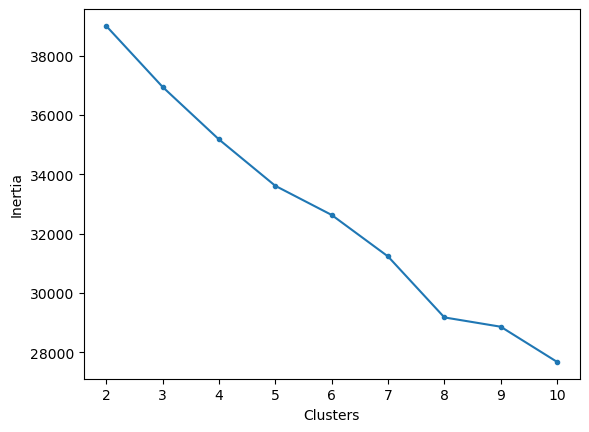

In [14]:
#Create an empty list of inertias
inertias = []
#Loop through k values between 2 and 10 and store the inertias in the list.
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state = 42)
    kmeans.fit(X_train_tf)
    inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('Clusters')
plt.ylabel('Inertia')


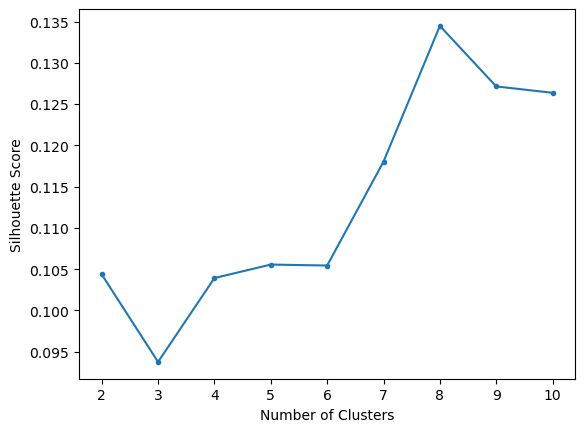

In [15]:
# Visualize different silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i, n_init = 'auto', random_state = 42)
  kmeans.fit(X_train_tf)
  silhouette_scores.append(silhouette_score(X_train_tf, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');


*  Looking at the Elbow plot, 8 clusters is recommended
*  Looking at the Silhouette score,  8 clusters would be recommended
*  Since both method of evaluation agree, will use 8 clusters.

### KMeans Model

In [16]:
# Fit kmeans model with 2 clusters and display the silhouette score
kmeans = KMeans(n_clusters = 8, n_init = 'auto', random_state = 42)
kmeans.fit(X_train_tf)
silhouette_score(X_train_tf, kmeans.labels_)

0.1344746518929928

In [21]:
#Save clusters to the dataframe
X_train_cluster = X_train_tf.copy()
X_train_cluster['cluster'] = kmeans.labels_

In [22]:
X_test_cluster = X_test_tf.copy()
X_test_cluster['cluster'] = kmeans.predict(X_test_tf)

In [25]:
dt = DecisionTreeClassifier()
dt.fit(X_train_cluster, y_train)

DecisionTreeClassifier()

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

      MetSyn       1.00      1.00      1.00       618
   No MetSyn       1.00      1.00      1.00      1182

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



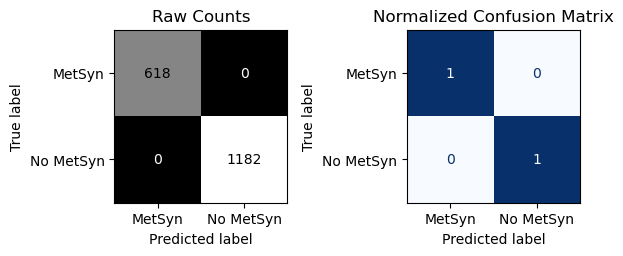


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

      MetSyn       0.81      0.79      0.80       204
   No MetSyn       0.90      0.91      0.90       397

    accuracy                           0.87       601
   macro avg       0.85      0.85      0.85       601
weighted avg       0.87      0.87      0.87       601



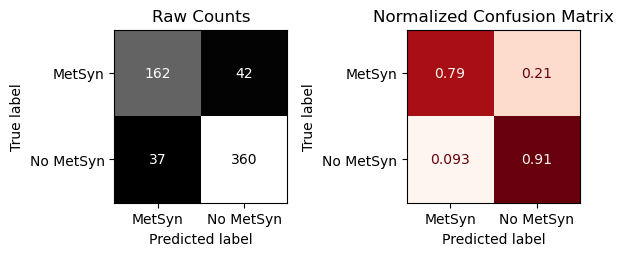

In [28]:
evaluate_classification(dt, X_train_cluster, y_train, X_test_cluster, y_test)